# Predictive Modeling - Logistic Regression

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

# Function for displaying all columns
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 1000): 
            display(df)

In [105]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix

# Function for plotting the confusion matrix
def plot_confusion_matrix(cnf_mtx, model_name='Model'):
    fig, ax = plt.subplots(figsize=(6, 6))
    title = model_name + ' Confusion Matrix'
    ax = sns.heatmap(cnf_mtx, annot=True, fmt="d", cbar=False, cmap='Blues', square=True)
    ax = ax.set(title=title, xlabel='Predicted Label', ylabel='True Label')

# Function for plotting ROC with AUC
def plot_roc_curve(actuals, probs, model_name='Model'):
    """ Function takes a8998l,llctual Y labels and prediciton probabilities for 
        both classes. Function uses these to plot ROC-curves and AUC.
    """
    # Calculating true and false positive rates
    fpr, tpr, _ = roc_curve(actuals.values.ravel(), probs[:,1])
    
    # Calculating AUC
    auc = roc_auc_score(actuals.values.ravel(), probs[:,1])
    
    # Create plot legend with AUC metric
    label = model_name + ', AUC: %.3f' % auc
    
    # Plot the roc curve for the model
    plt.figure(figsize=(10,10))
    plt.plot(fpr, tpr, label=label)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

## Baseline Model

In [106]:
# Reading data 
trainX = pd.read_csv('../data/trainX.csv')
trainY = pd.read_csv('../data/trainY.csv')
validX = pd.read_csv('../data/validX.csv')
validY = pd.read_csv('../data/validY.csv')

print(trainX.shape, trainY.shape, validX.shape, validY.shape)
display_all(trainX.head(10).transpose())

(31647, 48) (31647, 1) (6782, 48) (6782, 1)


,0,1,2,3,4,5,6,7,8,9
age,36,56,46,41,38,33,43,61,36,47
default,0,0,0,0,0,0,0,0,0,0
balance,0,196,0,3426,0,839,429,938,2415,1152
housing,0,0,1,0,1,1,1,0,1,0
loan,0,0,0,0,0,0,0,0,0,0
day,17,19,5,1,20,28,27,15,22,7
duration,153,312,83,302,90,469,222,212,73,260
campaign,4,3,2,1,1,3,4,2,1,13
pdays,-1,-1,-1,119,-1,-1,-1,92,86,-1
previous,0,0,0,5,0,0,0,5,4,0


In [85]:
# Training a simple classifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(trainX, trainY.values.ravel())
predY = lr.predict(validX)
probs = lr.predict_proba(validX)

/Users/rikubehm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


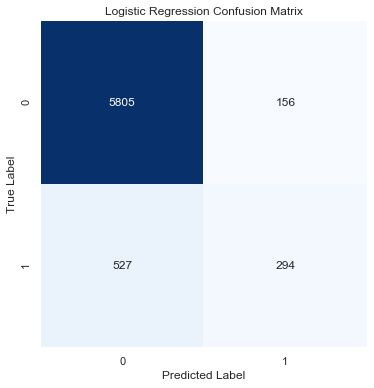

In [86]:
# Get and visualize confusion matrix
cnf_mtx = confusion_matrix(validY, predY)
plot_confusion_matrix(cnf_mtx, model_name='Logistic Regression')

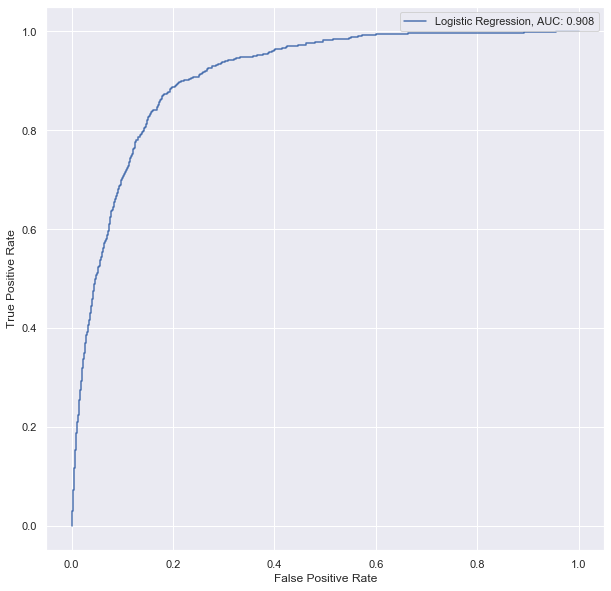

In [87]:
plot_roc_curve(validY, probs, model_name='Logistic Regression')

## Baseline model with Balanced Dataset

In [115]:
# Reading data 
balanced_trainX = pd.read_csv('../data/balanced_trainX.csv')
balanced_trainY = pd.read_csv('../data/balanced_trainY.csv')
validX = pd.read_csv('../data/validX.csv')
validY = pd.read_csv('../data/validY.csv')

print(balanced_trainX.shape, balanced_trainY.shape, validX.shape, validY.shape)
display_all(balanced_trainX.head(10).transpose())

(55912, 48) (55912, 1) (6782, 48) (6782, 1)


,0,1,2,3,4,5,6,7,8,9
age,36,56,46,41,38,33,43,61,36,47
default,0,0,0,0,0,0,0,0,0,0
balance,0,196,0,3426,0,839,429,938,2415,1152
housing,0,0,1,0,1,1,1,0,1,0
loan,0,0,0,0,0,0,0,0,0,0
day,17,19,5,1,20,28,27,15,22,7
duration,153,312,83,302,90,469,222,212,73,260
campaign,4,3,2,1,1,3,4,2,1,13
pdays,-1,-1,-1,119,-1,-1,-1,92,86,-1
previous,0,0,0,5,0,0,0,5,4,0


/Users/rikubehm/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


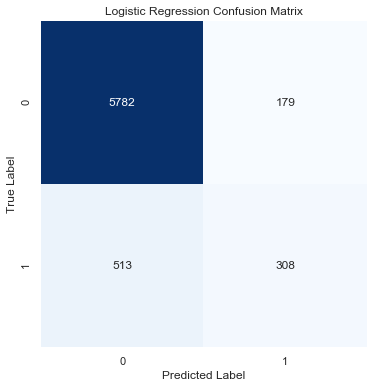

In [116]:
#Training the classifier
lr = LogisticRegression().fit(balanced_trainX, balanced_trainY.values.ravel())
predY = lr.predict(validX)
probs = lr.predict_proba(validX)

# Get and visualize confusion matrix
cnf_mtx = confusion_matrix(validY, predY)
plot_confusion_matrix(cnf_mtx, model_name='Logistic Regression')

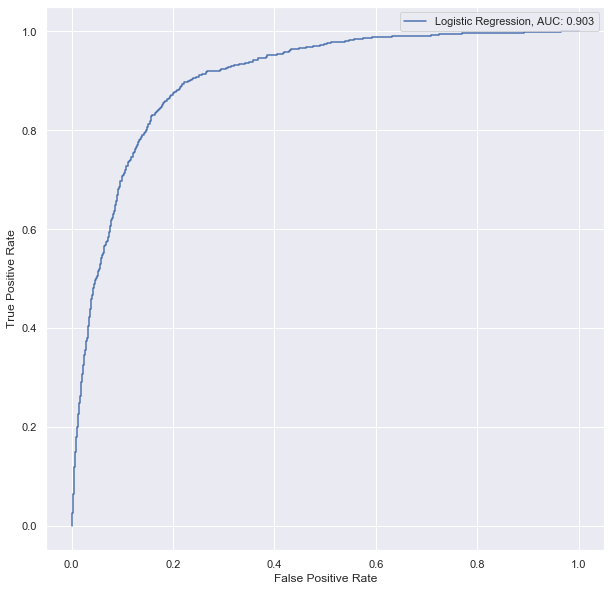

In [117]:
plot_roc_curve(validY, probs, model_name='Logistic Regression')

## Tuning Hyperparameters

In [118]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [108]:
#Solver: https://towardsdatascience.com/dont-sweat-the-solver-stuff-aea7cddc3451
#L1 and L2: https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c

In [128]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(LogisticRegression(), param_grid = param_grid, scoring = 'roc_auc', cv = 3, verbose = True, n_jobs = -1)
best_clf = clf.fit(trainX, trainY)
best_clf.best_estimator

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


ValueError: error_score must be the string 'raise' or a numeric value. (Hint: if using 'raise', please make sure that it has been spelled correctly.)